Mathematically, adding a white additive gaussian noise to an image is as simple
as $Y = X + N$ where $N \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$

In [1]:
using ImageNoise, TestImages, ImageShow, ImageCore, ImageQualityIndexes

Let's add noise to gray image first

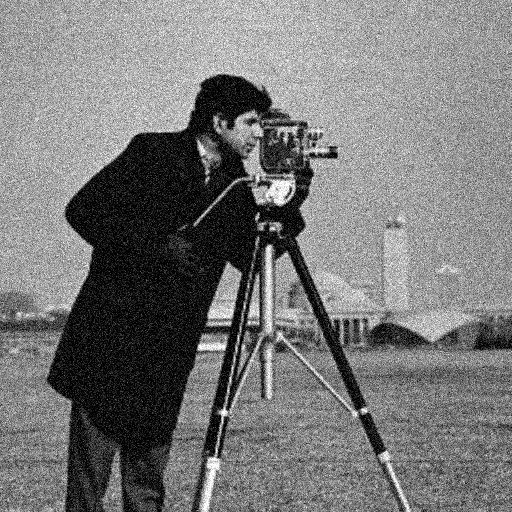

In [2]:
gray_img = testimage("cameraman") .|> float32
noise = AdditiveWhiteGaussianNoise(0.1)
gray_noisy_img = apply_noise(gray_img, noise)

For RGB image, noise aren't added to it channel by channel, instead, we generate
a $3\times M\times N$ gaussian noise and directly added to its channelview result.
Adding noise channel by channel would indeed get a different distribution (but
still a gaussian noise).

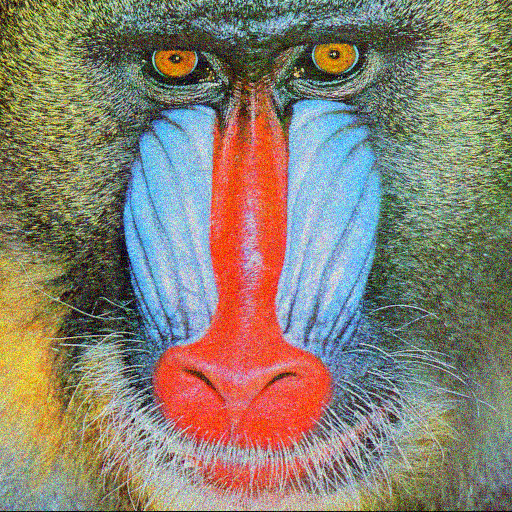

In [3]:
rgb_img = testimage("mandrill") .|> float32
rgb_noisy_img = apply_noise(rgb_img, noise)

Colorful images of other formats are converted to RGB first since RGB color
space is considered "linear".

In [4]:
hsv_img = HSV.(rgb_img)
hsv_noisy_img = apply_noise(hsv_img, noise)
incorrect_hsv_noisy_img = colorview(HSV, apply_noise(channelview(hsv_img), noise))

# If we compare their psnr, the second one is significantly lower than the first one
[psnr(rgb_noisy_img, RGB.(hsv_noisy_img))
psnr(rgb_noisy_img, RGB.(incorrect_hsv_noisy_img))]

2-element Array{Float32,1}:
 17.15936 
 13.786053

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*